# <center>Решение задачи регрессии</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.integrate import quad
import scienceplots
plt.style.use(['science'])

### **Дано:**

In [2]:
fileName = "XPS8.txt"
# Определим следующие константы для удобства
PEAK_COLOR = "tab:orange"   # цвет графика
GRAPH_COLOR = "tab:blue"    # цвет пиков
dX = 10                     # ширина выделения пика

### 1. Извлечем экспериментальные данные из файла

In [3]:
# Измерения
X, Y = [], []
# Заголовки столбцов
X_title, Y_title = str, str

with open(fileName, "r") as file:
    for line in file.readlines():
        data = line.strip().split()
        # Извлечем значения измерений
        if line[0] not in ['#', '\n']:
            X.append(float(data[0]))
            Y.append(float(data[1]))
        else:
            # Извлечем заголовки столбцов
            if "ColumnLabels:" in data:
                X_title = data[2:][0]
                Y_title = data[2:][1]
                
X = np.array(X)
Y = np.array(Y)

Построим на основе извлеченных данных график

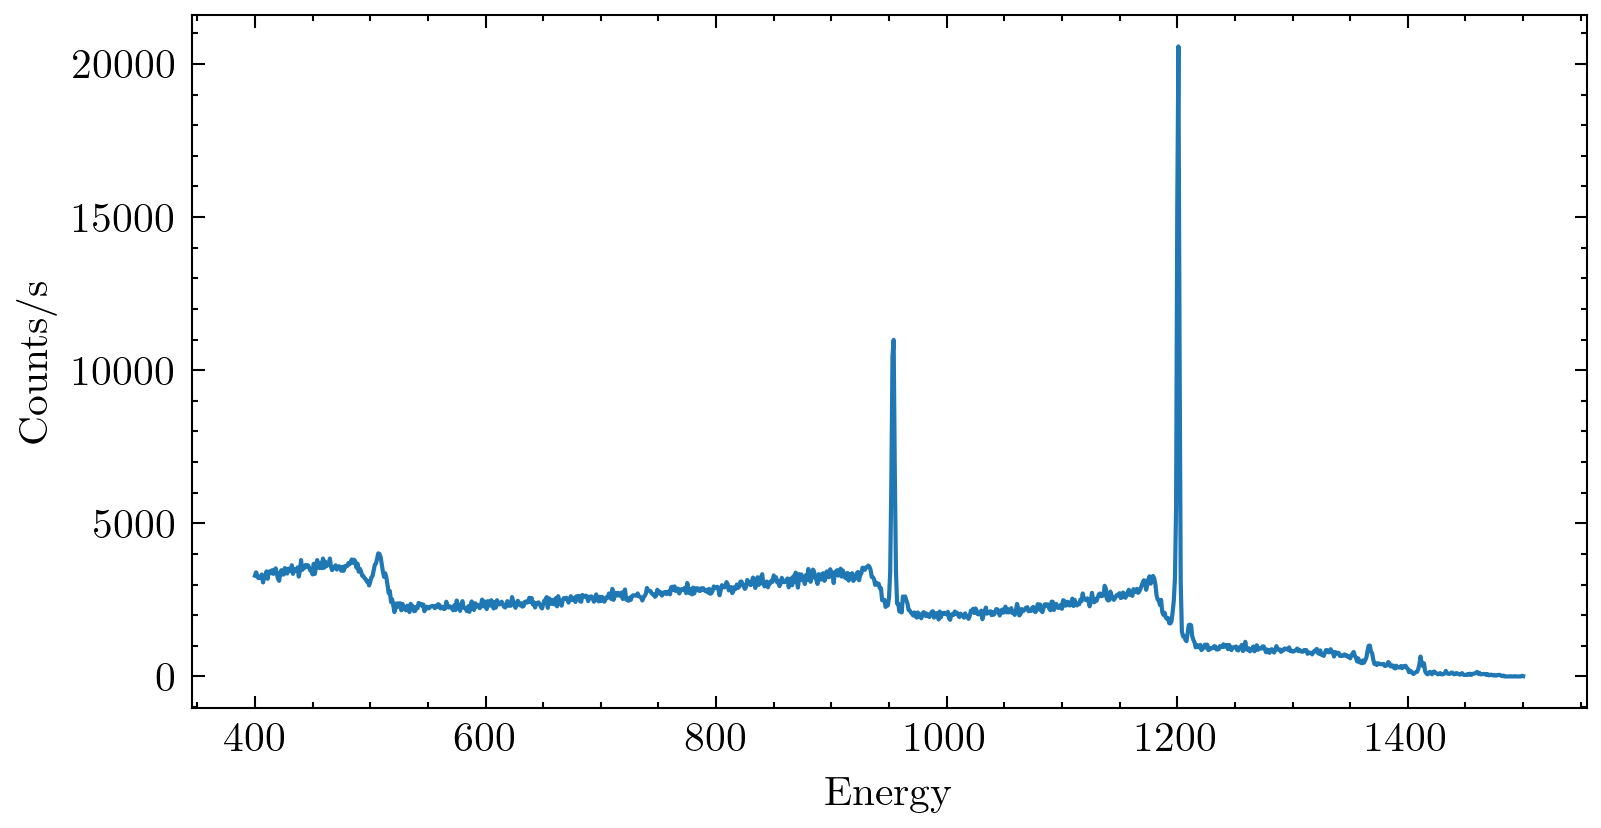

In [4]:
fig, ax = plt.subplots(figsize = (6, 3), dpi = 300)
ax.set_ylabel(Y_title)
ax.set_xlabel(X_title)
ax.plot(X, Y, color = GRAPH_COLOR)
plt.show()

### 2. Определим пики

In [5]:
# Индексы наиболее характерных пиков
peaks = find_peaks(Y, height = 4000)[0]

Отобразим наиболее характерние пики на графике

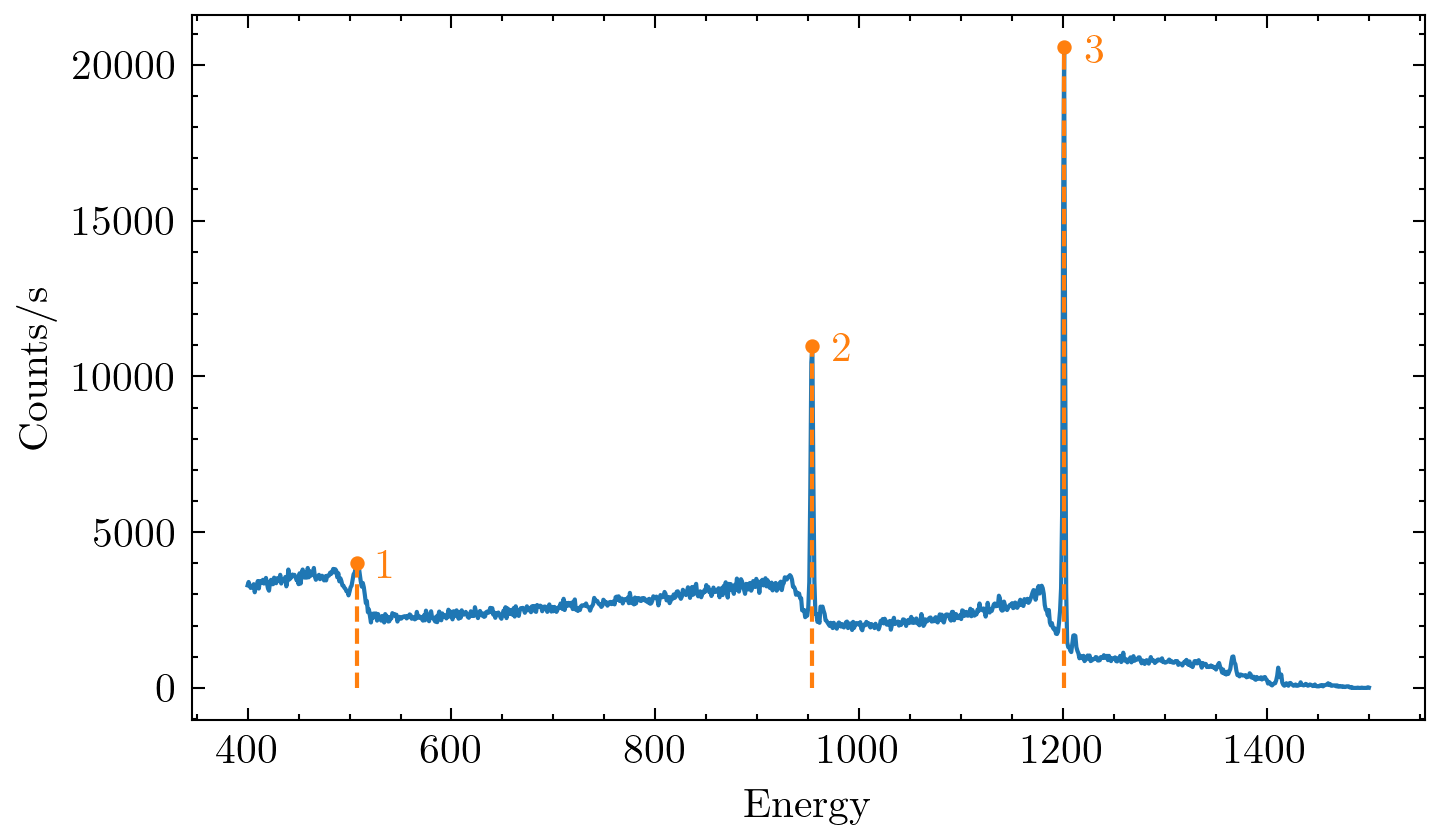

In [6]:
fig, ax = plt.subplots(figsize = (5, 3), dpi = 300)
ax.set_ylabel(Y_title)
ax.set_xlabel(X_title)
# Отображение графика
ax.plot(X, Y, color = GRAPH_COLOR)
# Отображение пиков
for peak in peaks:
    ax.scatter(X[peak], Y[peak], s = 6, color = PEAK_COLOR, zorder = 2)
    ax.text(X[peak] + 20, Y[peak] - 500, list(peaks).index(peak) + 1, color = PEAK_COLOR)
    ax.plot(np.array([X[peak], X[peak]]), np.array([0, Y[peak]]), color = PEAK_COLOR, linestyle = "dashed")
    
fig.tight_layout()
plt.show()

Изобразим пики в отдеальности, вычтев фоновый шум

In [7]:
def removeNoise(x_local: np.array, y_local: np.array) -> np.array:
    k = (y_local[-1] - y_local[0]) / (x_local[-1] - x_local[0])
    b = k * x_local[-1] - y_local[-1]
    return y_local - (k * x_local - b)

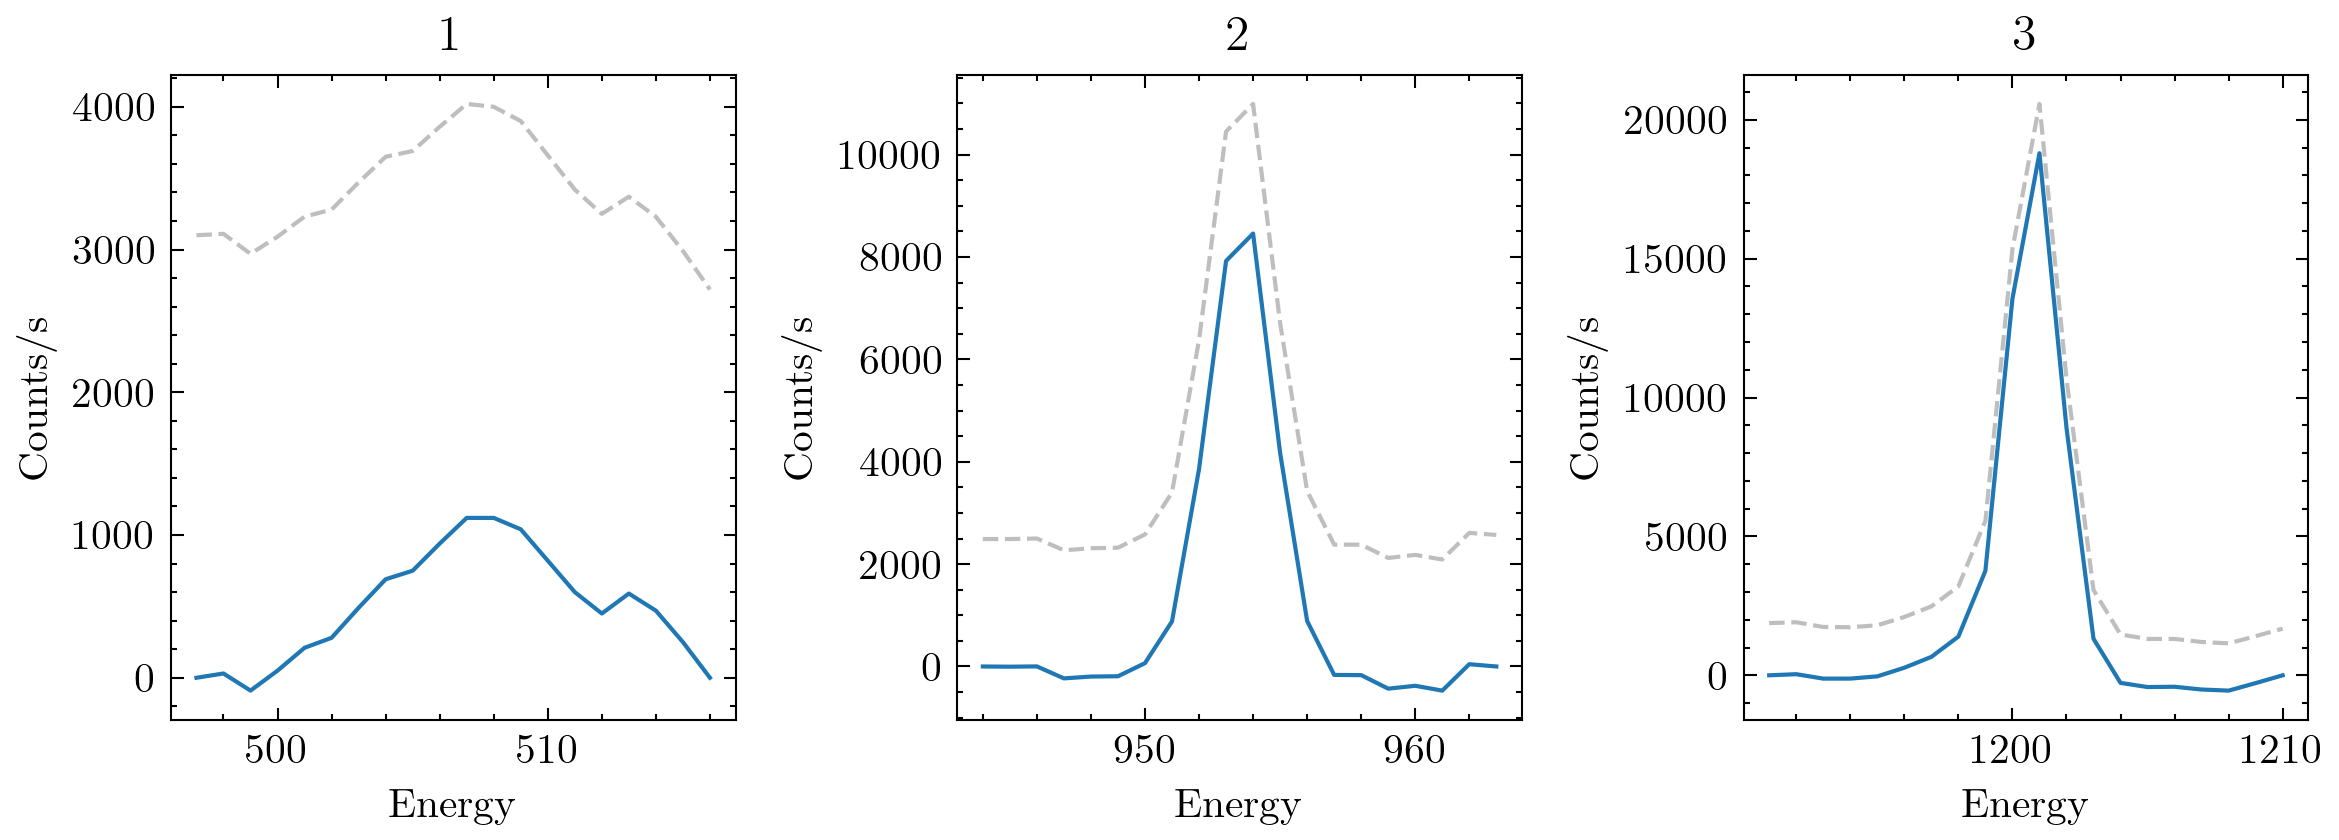

In [ ]:
fig, ax = plt.subplots(1, peaks.size, figsize = (8, 3), dpi = 300)
for i in range(peaks.size):
    ax[i].set_title(i + 1)
    ax[i].set_xlabel(X_title)
    ax[i].set_ylabel(Y_title)
    # Выделение точек, принадлежащих пику
    argMin = peaks[i] - int(dX // (X[1] - X[0]))
    argMax = peaks[i] + int(dX // (X[1] - X[0]))
    X_local = X[argMin:argMax]
    Y_local = Y[argMin:argMax]
    # Построение исходного пика (без шума)
    ax[i].plot(X_local, Y_local, linestyle = "dashed", color = "tab:gray", alpha = 0.5)
    # Построение пика без шумов
    ax[i].plot(X_local, removeNoise(X_local, Y_local), linestyle = "solid", color = GRAPH_COLOR)
fig.tight_layout()
plt.show()

### 3. Определим параметры пиков, аппроксимируя функцией Гаусса

In [12]:
def Gaussian(x, a, b, c,):
    return a * np.exp(-((x - b)**2) / (2 * c**2))

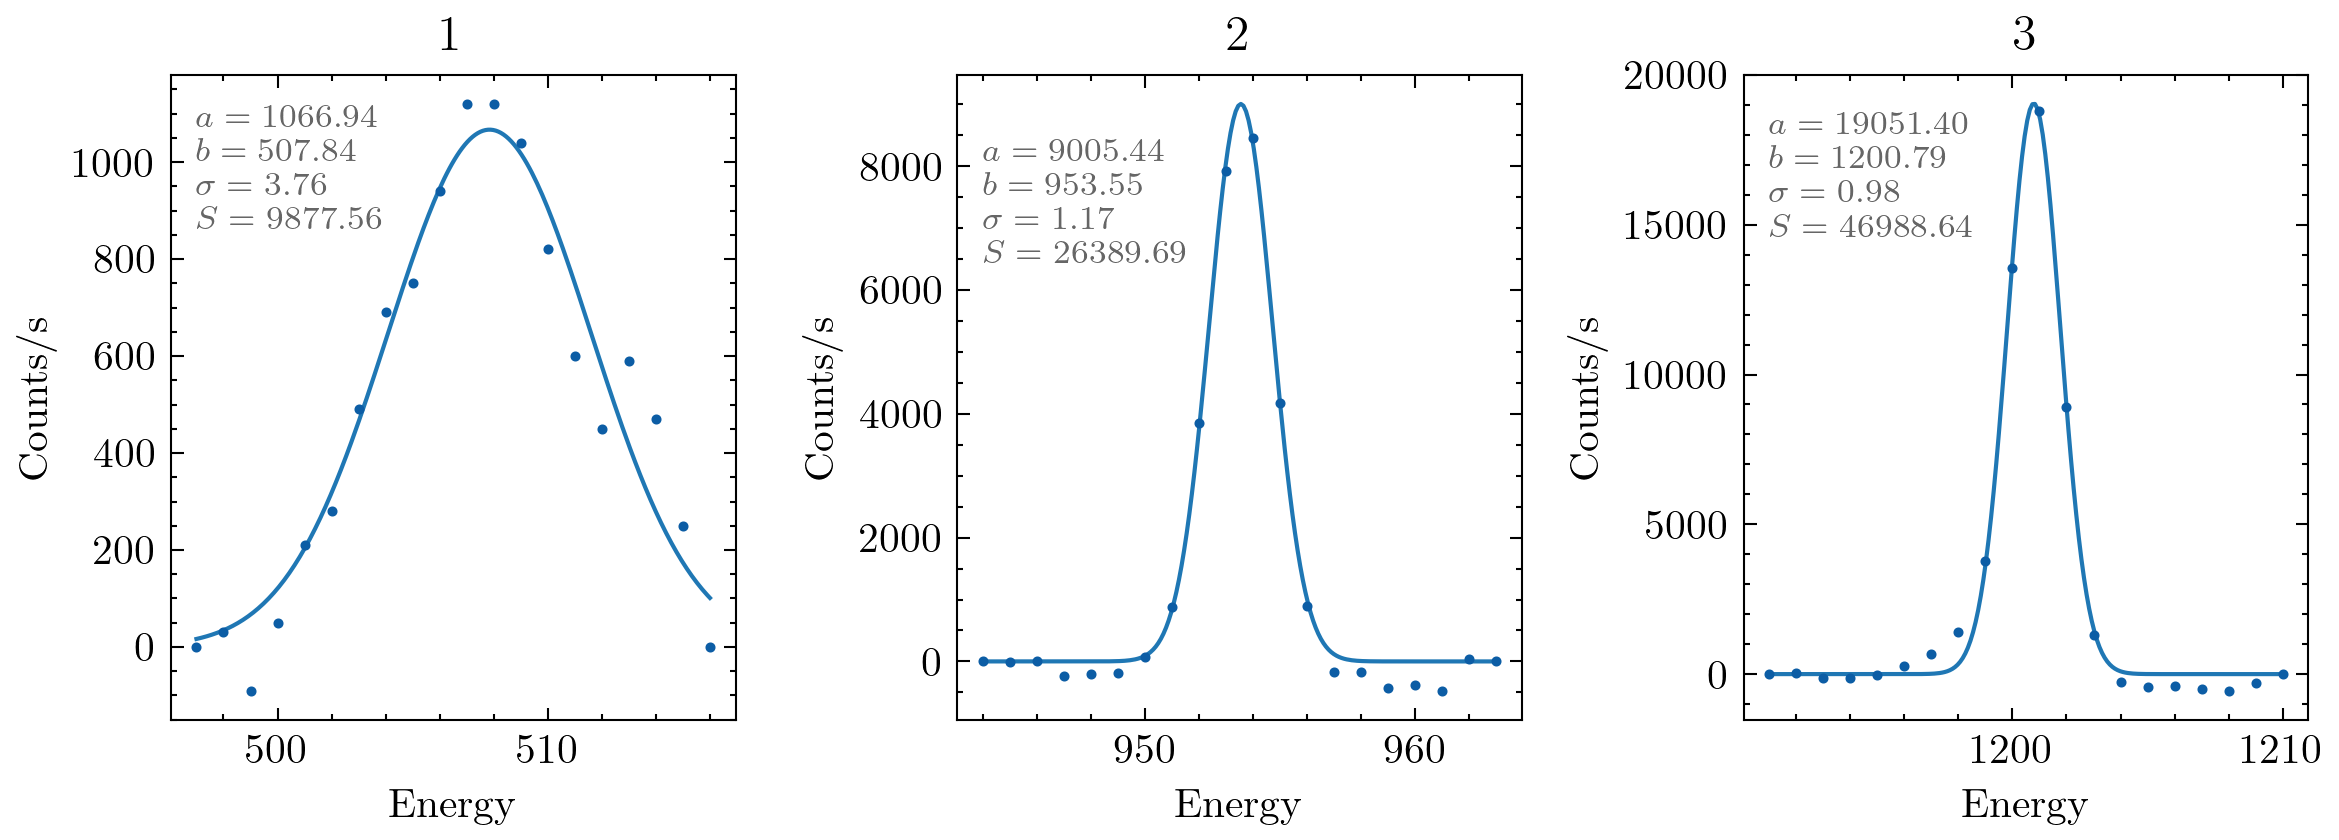

In [ ]:
fig, ax = plt.subplots(1, peaks.size, figsize = (8, 3), dpi = 300)
for i in range(peaks.size):
    ax[i].set_title(i + 1)
    ax[i].set_xlabel(X_title)
    ax[i].set_ylabel(Y_title)
    # Выделение точек, принадлежащих пику
    argMin = peaks[i] - int(dX // (X[1] - X[0]))
    argMax = peaks[i] + int(dX // (X[1] - X[0]))
    X_local = X[argMin:argMax]
    Y_local = removeNoise(X_local, Y[argMin:argMax])
    # Построение пика без фонового шума
    ax[i].scatter(X_local, Y_local, linestyle = "solid", s = 2, zorder = 3)
    # Аппроксимация
    params, _ = curve_fit(Gaussian, X_local, Y_local, p0 = [np.max(Y_local), np.median(X_local), 1])
    x = np.linspace(X_local[0], X_local[-1], 200)
    ax[i].plot(x, Gaussian(x, *params), linestyle = "solid", color = GRAPH_COLOR)
    # Вывод параметров пика: высота, координата, диспресия, площадь
    info = (
        f"$a = {params[0]:.2f}$\n"
        f"$b = {params[1]:.2f}$\n"
        f"$\\sigma = {params[2]:.2f}$\n"
        f"$S = {quad(Gaussian, x[0], x[-1], tuple(params))[0]:.2f}$"
    )
    ax[i].text(X_local[0], np.max(Y_local), info, ha = 'left',  va = 'top', alpha = 0.6, fontsize = 8)
fig.tight_layout()
plt.show()